# Example notebook for SSH Variability application

This notebook demonstrates how the SSH variability application works when the script is run. We first start by loading some of the modules, going up two levels so that we can import the `ssh` module

In [1]:
import sys
sys.path.insert(0, '../../')
import os
if os.getcwd().endswith("AQUA"):
    os.chdir("diagnostics/ssh/notebooks")
from ssh import sshVariability


Please make sure that your config file is updated with the path to the output folder where the outputs of this notebook should be saved. In this code, if the output_directory key is not found in the config file, the output_directory variable will be set to a directory named 'output' in the current working directory (os.getcwd()).

The following cell executes the 'ssh_class.py' script with sshVariability class. The script performs the following: 

1. Reads and parses the configuration file (`config.yml`) to retrieve the necessary parameters and settings for the script's execution. Please make sure that the config file is updated with the information you would like to analyze.

2. Within the `sshVariability` class, defines methods to retrieve, process, and analyze the SSH data for each model starting with AVISO observational data.

3. Saved the std computation under outputs along with visualization based on the target grid defined in the config file. AQUA regridder capability is used to regrid the data and visualize the results in subplots.

4. Difference plot between the model data and the AVISO data is plotted in subplots

In [2]:
os.getcwd()

'/pfs/lustrep3/scratch/project_465000454/sughosh/AQUA/diagnostics/ssh/notebooks'

2024-05-20 22:42:12 :: ssh_logger :: INFO     -> Dask Dashboard URL: http://127.0.0.1:8787/status
2024-05-20 22:42:12 :: ssh_logger :: INFO     -> Workers=8, Memory=223.52 GiB
2024-05-20 22:42:12 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-05-20 22:42:13 :: Reader :: WARNING  -> The requested default fixer name AVISO-default does not exist in fixes files
2024-05-20 22:42:13 :: Reader :: WARNING  -> No fixes available for model AVISO, experiment ssh-L4, source daily
2024-05-20 22:42:15 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-05-20 22:42:15 :: Reader :: WARNING  -> The requested default fixer name AVISO-default does not exist in fixes files
2024-05-20 22:42:15 :: Reader :: WARNING  -> No fixes available for model AVISO, experiment ssh-L4, source daily
2024-05-20

<xarray.DataArray 'adt' (latitude: 720, longitude: 1440)> Size: 8MB
dask.array<_sqrt, shape=(720, 1440), dtype=float64, chunksize=(720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m


2024-05-20 22:42:20 :: ssh_logger :: INFO     -> computation for AVISO ssh complete, saving output file


/opt/conda/lib/python3.12/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
2024-05-20 22:42:53 :: ssh_logger :: INFO     -> Now loading data for other models to compare against AVISO ssh variability
2024-05-20 22:42:53 :: ssh_logger :: INFO     -> initializing AQUA reader to read the model inputs for {'name': 'ICON', 'experiment': 'ssp370', 'source': 'daily-hpz10-oce2d', 'regrid': 'r010', 'variable': 'avg_zos', 'zoom': 10, 'timespan': ['2020-01-01', '2020-03-30']}
2024-05-20 22:42:54 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-05-20 22:43:13 :: ssh_logger :: INFO     -> ICON data spans from 2020-01-01T00:00:00.000000000 to 2033-06-29T00:00:00.000000000
2024-05-20 22:43:13 :: ssh_logger :: INFO     -> Getting SSH data complete for ICON, now computing standard deviation on the default timestamp
2024-0

CPU times: user 45.1 s, sys: 7.21 s, total: 52.3 s
Wall time: 1min 53s


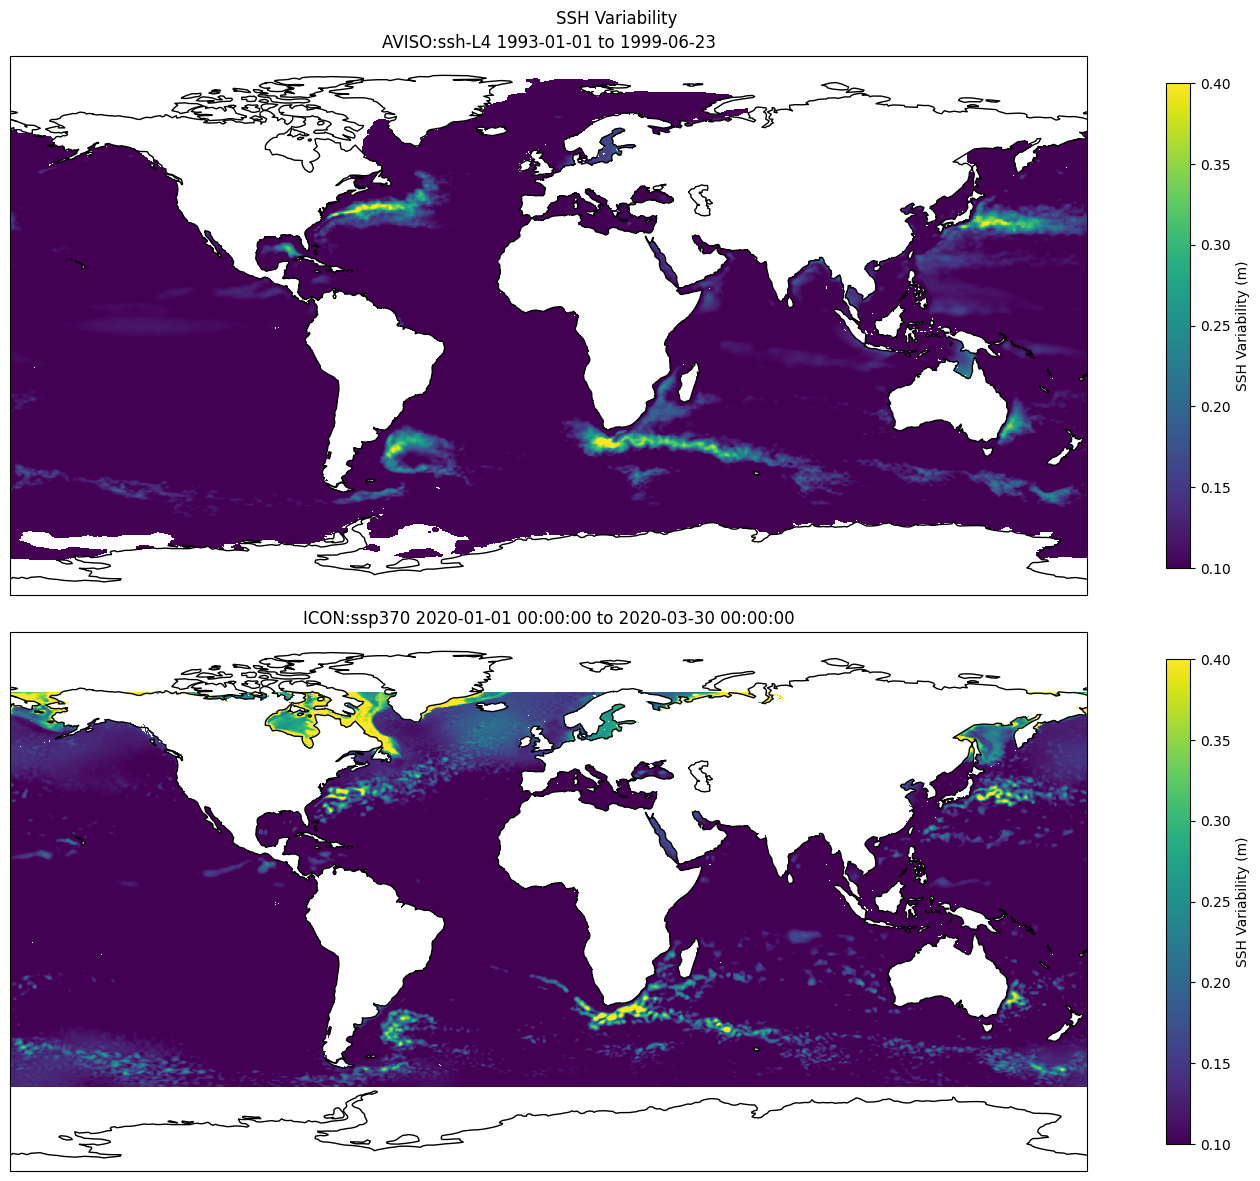

In [3]:
%%time
analyzer = sshVariability('../config.yaml')
analyzer.run()
# runtime is around 10-15 min depending on how much data you wish to analyse.

Double-Checking the output files. The cells below are just checking if the output files contain the right data.

The subfolders "NetCDF" and "PDF" are automatically created under your defined "Output" folder. This is where individual outputs will get saved. Note: NetCDF files that get saved are ungridded as they get saved before AQUA regridder is used.

In [4]:
import xarray as xr

In [5]:
# Specify the path to the NetCDF file output
file_path = './netcdf/AVISO_ssh-L4_daily_std.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data

<xarray.Dataset> Size: 8MB
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables:
    adt        (latitude, longitude) float64 8MB ...